In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()
! conda update -n base -c conda-forge conda
! pip install tdqm
! mamba install openmc
! wget -O - https://anl.box.com/shared/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz | tar -C /content/ -xJ

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...


In [ ]:
%cd /content/endfb-vii.1-hdf5/neutron
%ls

/content/endfb-vii.1-hdf5/neutron
Ac225.h5              Cm240.h5         Hf178.h5     Pd102.h5     Sr84.h5
Ac226.h5              Cm241.h5         Hf179.h5     Pd104.h5     Sr86.h5
Ac227.h5              Cm242.h5         Hf180.h5     Pd105.h5     Sr87.h5
Ag107.h5              Cm243.h5         Hg196.h5     Pd106.h5     Sr88.h5
Ag109.h5              Cm244.h5         Hg198.h5     Pd107.h5     Sr89.h5
Ag110_m1.h5           Cm245.h5         Hg199.h5     Pd108.h5     Sr90.h5
Ag111.h5              Cm246.h5         Hg200.h5     Pd110.h5     Ta180.h5
Al27.h5               Cm247.h5         Hg201.h5     Pm147.h5     Ta181.h5
Am240.h5              Cm248.h5         Hg202.h5     Pm148.h5     Ta182.h5
Am241.h5              Cm249.h5         Hg204.h5     Pm148_m1.h5  Tb159.h5
Am242.h5              Cm250.h5         Ho165.h5     Pm149.h5     Tb160.h5
Am242_m1.h5           Co58.h5          Ho166_m1.h5  Pm151.h5     Tc99.h5
Am243.h5              Co58_m1.h5       I127.h5      Pr141.h5     Te120.h5
Am244.h5   

In [ ]:
import openmc

umet = openmc.Material()
umet.add_nuclide("U235", 0.9473, 'wo')
umet.add_nuclide("U238", 0.0527, 'wo')
umet.add_nuclide("U234", 0.0102, 'wo')
umet.set_density("g/cm3", 18.74)

mats = openmc.Materials([umet])
mats.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
mats.export_to_xml()

esfera = openmc.Sphere(R=8.74, boundary_type="vacuum")
godiva = openmc.Cell(region = -esfera, fill=umet)
simulation = openmc.Universe(cells=[godiva])

geom = openmc.Geometry(simulation)
geom.export_to_xml()

run = openmc.Settings()
run.run_mode = "eigenvalue"
run.particles = 100000
run.batches = 110
run.inactive = 10
run.export_to_xml()

/usr/local/lib/python3.8/site-packages/openmc/surface.py:1609: FutureWarning: "Sphere(...) accepts an argument named 'r', not 'R'. Future versions of OpenMC will not accept the capitalized version.
  warn(_WARNING_UPPER.format(type(self).__name__, 'r', 'R'),


In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
%matplotlib inline
import os
from pprint import pprint
import shutil
import subprocess
import urllib.request

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.patches import Rectangle

import openmc.data

Text(0, 0.5, 'Cross section (b)')

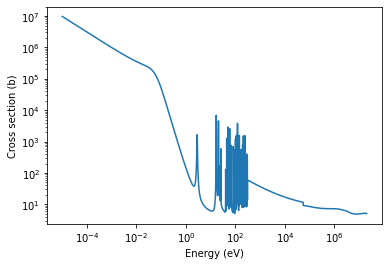

In [ ]:
url = 'https://anl.box.com/shared/static/kxm7s57z3xgfbeq29h54n7q6js8rd11c.ace'
filename, headers = urllib.request.urlretrieve(url, 'gd157.ace')
gd157 = openmc.data.IncidentNeutron.from_ace('gd157.ace')
total = gd157[1]
energies = gd157.energy['294K']
total_xs = total.xs['294K'](energies)
plt.loglog(energies, total_xs)
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

In [ ]:
print (np.shape(energies))
print (np.shape(total_xs))

(12074,)
(12074,)


In [ ]:
Silicon28 = openmc.data.IncidentNeutron.from_hdf5('/content/endfb-vii.1-hdf5/neutron/Si28.h5')

In [ ]:
hf = h5py.File('Si28.h5', 'r')
main_group = hf['Si28/reactions']
for name, obj in sorted(list(main_group.items()))[:10]:
    if 'reaction_' in name:
        print('{}, {}'.format(name, obj.attrs['label'].decode()))

reaction_002, (n,elastic)
reaction_005, (n,misc)
reaction_016, (n,2n)
reaction_022, (n,na)
reaction_028, (n,np)
reaction_051, (n,n1)
reaction_052, (n,n2)
reaction_053, (n,n3)
reaction_054, (n,n4)
reaction_055, (n,n5)


In [ ]:
nelastic_group = main_group['reaction_002']
print (nelastic_group['294K/xs'][()])


[21.15656   20.83591   20.52954   ...  0.3265487  0.3183026  0.31026  ]


In [ ]:
energies = np.array(Silicon28.energy['294K'])
print (np.shape(energies))
print (np.shape(nelastic_group['294K/xs']))
xs = nelastic_group['294K/xs'][()]
print (np.shape(energies))
print (np.shape(xs))

(7447,)
(7447,)
(7447,)
(7447,)


Text(0, 0.5, 'Cross section (b)')

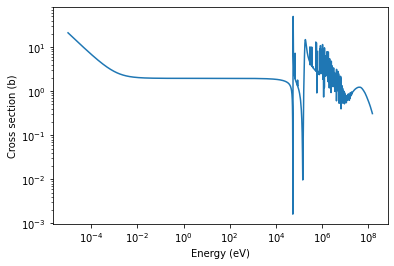

In [ ]:
test = np.linspace(0, 1000, 7447)
plt.loglog(energies, xs)
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

In [ ]:
from google.colab import files
files.download('/content/endfb-vii.1-hdf5/neutron/Si28.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>